In [33]:
import pandas as pd
import yfinance as yf
from FinMind.data import DataLoader
import matplotlib.pyplot as plt
import mplfinance as mpf

# FinMind


In [ ]:
api = DataLoader()
df=  api.taiwan_stock_info()

In [7]:
df['industry_category'].unique()

array(['光電業', '文化創意業', '電腦及週邊設備業', '電子零組件業', '其他電子類', '上櫃指數股票型基金(ETF)',
       '生技醫療業', '受益證券', '所有證券', '其他', '其他電子業', '紡織纖維', '電機機械', '電子工業',
       '貿易百貨', '電子通路業', '化學工業', '指數投資證券(ETN)', '塑膠工業', '半導體業', '航運業',
       '觀光事業', '資訊服務業', '橡膠工業', '金融業', '創新板股票', '通信網路業', '食品工業', '電子商務業',
       '化學生技醫療', '觀光餐旅', '電器電纜', '綠能環保類', '農業科技', '居家生活', '數位雲端', '運動休閒類',
       '創新版股票', 'ETN', '金融保險', '存託憑證', '建材營造', 'ETF', '綠能環保', '上櫃ETF',
       '造紙工業', '汽車工業', '鋼鐵工業', '數位雲端類', '油電燃氣業', '農業科技業', '居家生活類', '運動休閒',
       '玻璃陶瓷', '水泥工業', 'Index', '大盤'], dtype=object)

In [8]:
df.head()

,industry_category,stock_id,stock_name,type,date
0,光電業,3629,地心引力,tpex,2020-06-03
1,文化創意業,3687,歐買尬,tpex,2020-06-03
2,電腦及週邊設備業,5450,寶聯通,tpex,2020-06-03
3,電子零組件業,5481,新華,tpex,2020-06-03
4,其他電子類,6238,勝麗,tpex,2020-06-13


# Yahoo Finance

 > **```auto_adjust```** 記得設定為 **```False```**，會多看到 ```Adj Close```欄位  
 > 沒有設定，預設為 ```True```，則出現的欄位，都是還原的價格，**```但其實還原的股價，本身不是真正股價，所以不能拿來用!!!```**，他是拿來 **```計算報酬率```** 的  

 > **```back_adust```** 調整還原方式，向前或向後 **```True```** 為向後 

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2011-09-06 00:00:00,44.76,66.10,67.20,66.10,66.50,"38,972,000.00"
2016-05-23 00:00:00,117.29,154.00,154.50,149.50,150.50,"50,127,000.00"
2024-04-22 00:00:00,723.67,742.00,757.00,740.00,740.00,"46,540,798.00"
2011-07-06 00:00:00,49.30,72.80,73.40,72.50,73.20,"42,991,000.00"
2022-05-26 00:00:00,480.49,514.00,525.00,513.00,523.00,"28,327,403.00"


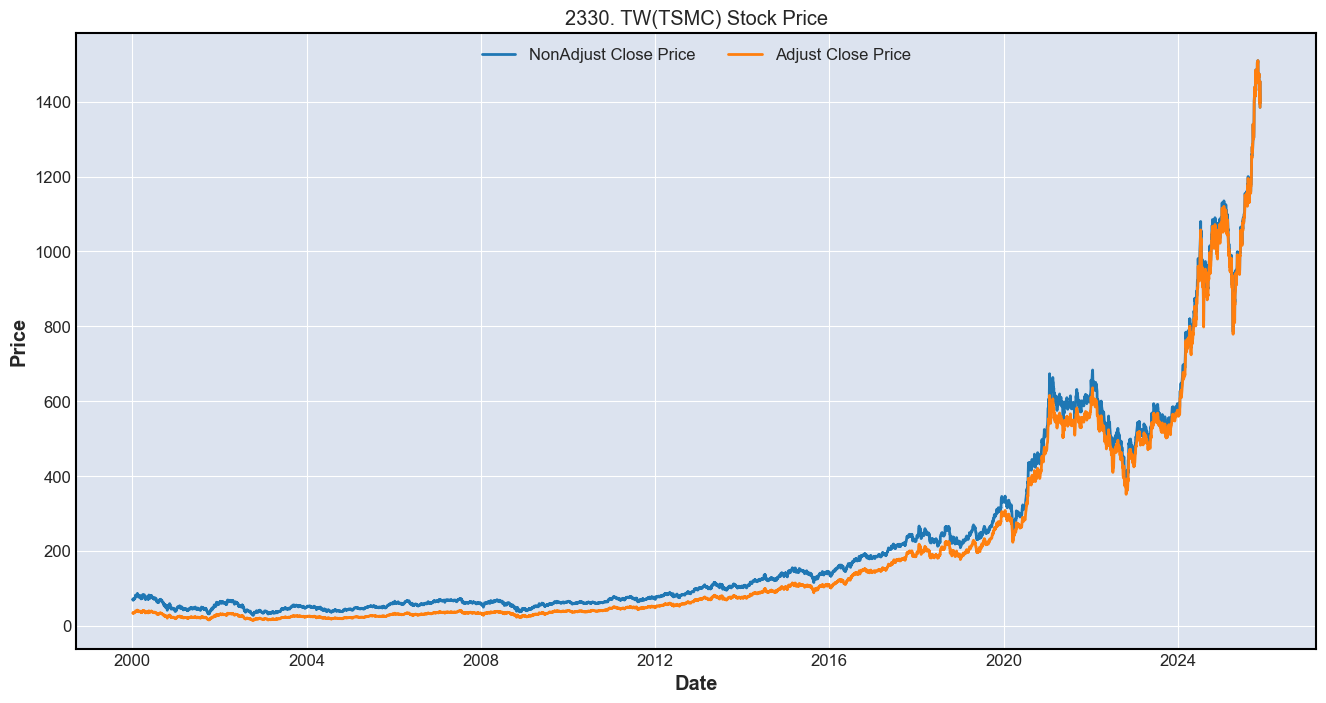

In [55]:
df = yf.download('2330.TW', auto_adjust = False, start = '1999-01-01')
df.columns = df.columns.get_level_values(0)
display(df.sample(5).style.format('{:,.2f}'))
plt.figure(figsize = (16, 8))
# df[['Close', 'Adj Close']].plot(ax = plt.gca()) # Pandas內建
plt.plot(df.index, df['Close'])
plt.plot(df.index, df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2330. TW(TSMC) Stock Price')
plt.legend(['NonAdjust Close Price', 'Adjust Close Price'], loc = 'upper center', ncol = 2)
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


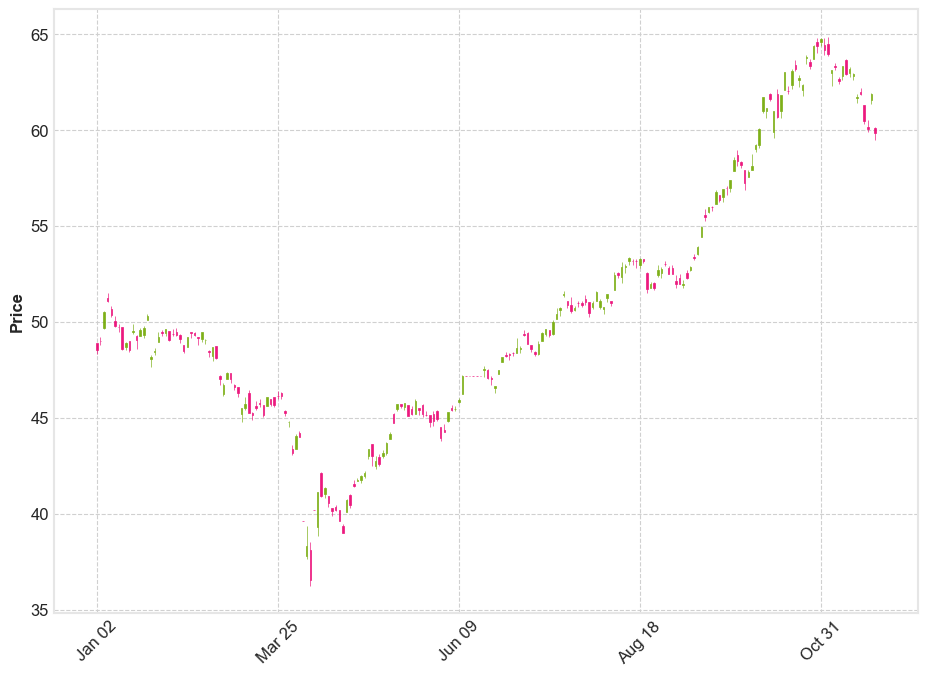

In [61]:
tw0050 = yf.download('0050.TW', auto_adjust = False, start = '2025-01-01')
tw0050.columns = tw0050.columns.get_level_values(0)

mpf.available_styles()
mpf.plot(tw0050, type = 'candle', style = 'binance', figscale = 1.5)


## 股價觀察

### 基本畫法

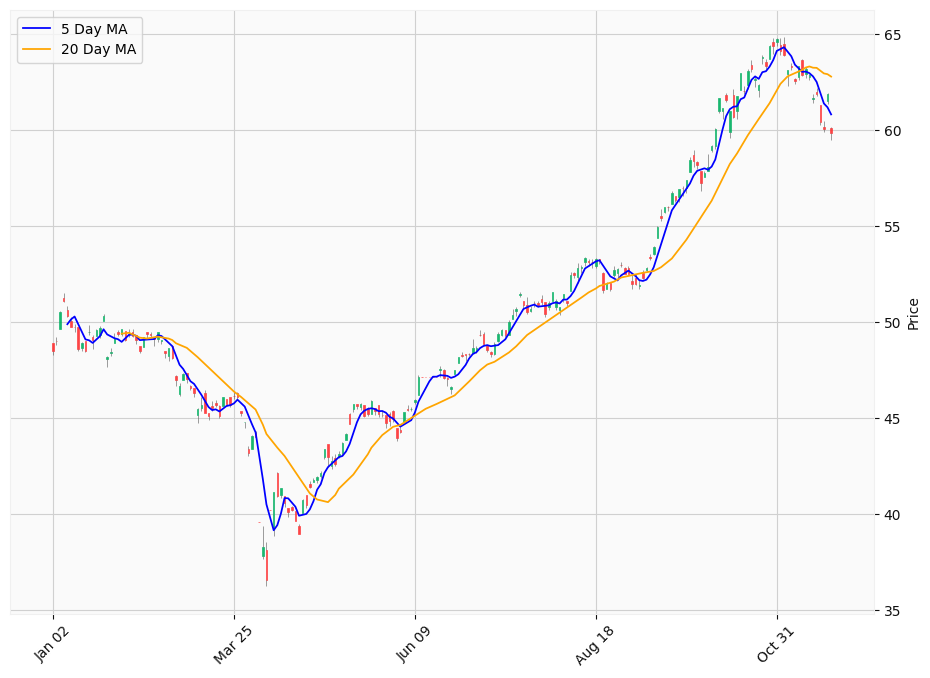

In [67]:
tw0050['5ma'] = tw0050.rolling(5)['Close'].mean()
tw0050['20ma'] = tw0050.rolling(20)['Close'].mean()
addps = []
addps.append(mpf.make_addplot(tw0050['5ma'], color = 'blue', label = '5 Day MA'))
addps.append(mpf.make_addplot(tw0050['20ma'], color = 'orange', label = '20 Day MA'))
mpf.available_styles()
mpf.plot(tw0050, type = 'candle', style = 'yahoo', figscale = 1.5, addplot = addps)

### 其他畫法

d:\03_Tibame\06_金融數據分析\實際操作\venv\Lib\site-packages\mplfinance\plotting.py:433: UserWarning: 



  warnings.warn('\n\n ================================================================= '+


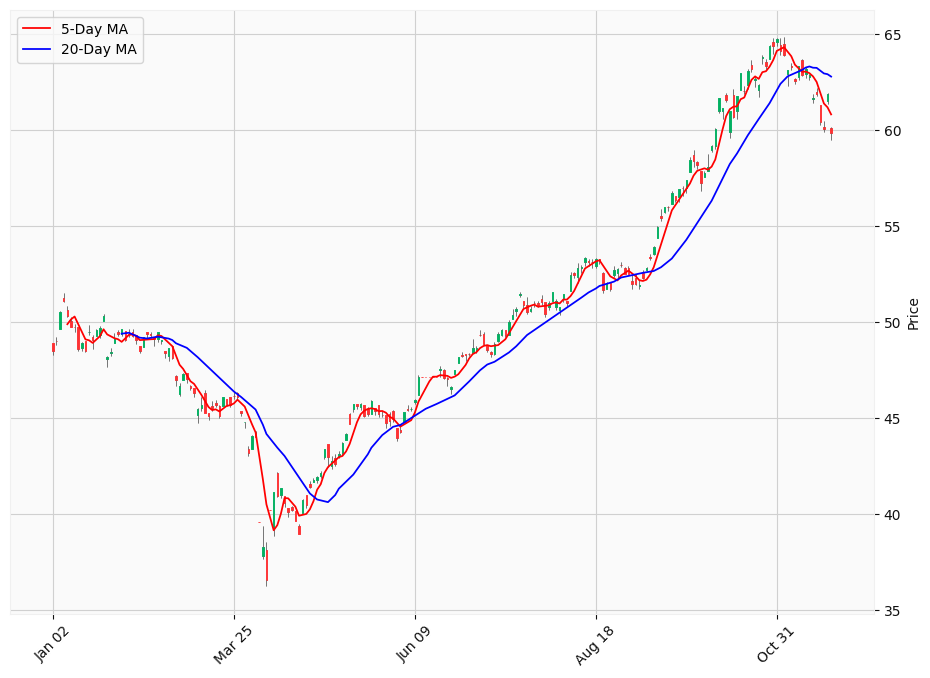

In [72]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# ... (數據和 MA 計算保持不變) ...

# 1. 創建 Figure 和 Axes
fig, axes = mpf.plot(
    tw0050, 
    type='candle', 
    style='yahoo', 
    figscale=1.5, 
    returnfig=True  # <-- 讓 mpf.plot 返回 Figure 和 Axes 物件
)

# 2. 獲取主圖表 Axes 物件
# 在 mplfinance 中，主圖表 Axes 位於 axes[0]
main_ax = axes[0] 

# 3. 重新定義 addplots，並指定它們的 Axes 
addps = []
addps.append(mpf.make_addplot(
    tw0050['5ma'], 
    color='red',     
    label='5-Day MA',
    ax=main_ax      # <-- 將 addplot 綁定到主 Axes
))
addps.append(mpf.make_addplot(
    tw0050['20ma'], 
    color='blue',    
    label='20-Day MA',
    ax=main_ax      # <-- 將 addplot 綁定到主 Axes
))

# 4. 再次呼叫 plot 來繪製 addplots
mpf.plot(tw0050, type='candle', style='yahoo', figscale=3, addplot=addps, ax=main_ax)

# 5. 手動添加 Matplotlib 圖例
main_ax.legend(loc='upper left', ncol=1) # <-- 使用 Matplotlib 原生的 legend()

plt.show()

## 壓力跟支撐

 > 在交易日曆上，一個月通常包含大約 20 至 22 個交易日（排除週末和假日）。因此，20 日均線在技術分析中被視為市場上投資者在近一個月內的平均持股成本。  

 > 由於 20 日均線是一個廣為人知且普遍使用的參數，許多機構投資者和散戶都會將其設為買賣決策的參考點。

[*********************100%***********************]  1 of 1 completed


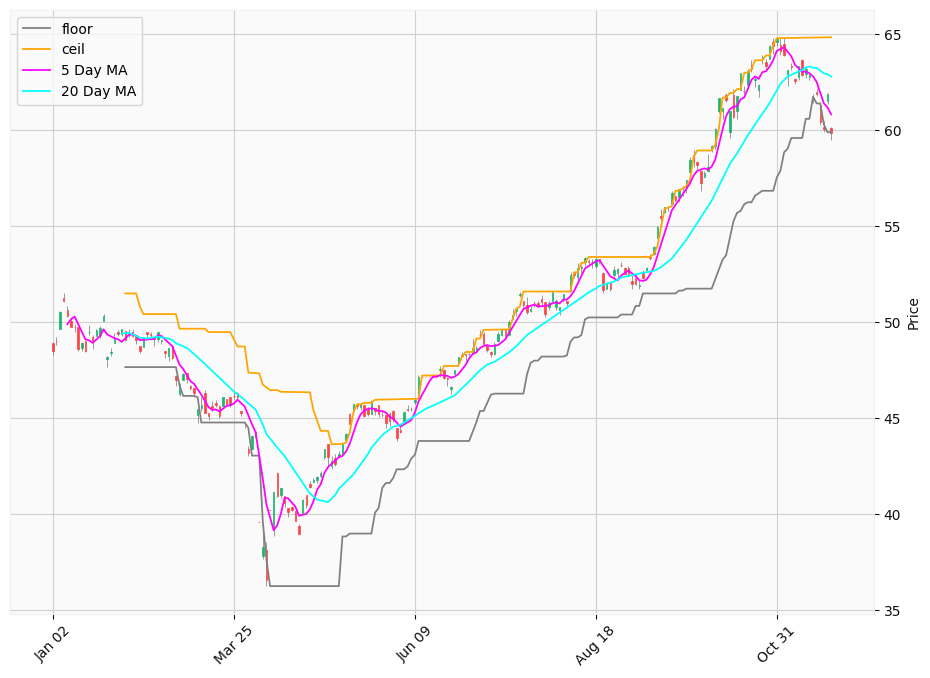

In [77]:
tw0050 = yf.download('0050.TW', auto_adjust = False, start = '2025-01-01')
tw0050.columns = tw0050.columns.get_level_values(0)
tw0050['floor'] = tw0050.rolling(20)['Low'].min().shift(1) # 20天的最低點 支撐線
tw0050['ceil'] = tw0050.rolling(20)['High'].max().shift(1) # 20天的最高點 壓力線
tw0050['5ma'] = tw0050.rolling(5)['Close'].mean()
tw0050['20ma'] = tw0050.rolling(20)['Close'].mean()

addps = []
addps.append(mpf.make_addplot(tw0050['floor'], color = 'gray', label = 'floor'))
addps.append(mpf.make_addplot(tw0050['ceil'], color = 'orange', label = 'ceil'))
addps.append(mpf.make_addplot(tw0050['5ma'], color = 'magenta', label = '5 Day MA'))
addps.append(mpf.make_addplot(tw0050['20ma'], color = 'cyan', label = '20 Day MA'))
mpf.available_styles()
mpf.plot(tw0050, type = 'candle', style = 'yahoo', figscale = 1.5, addplot = addps)

## 風險評估

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

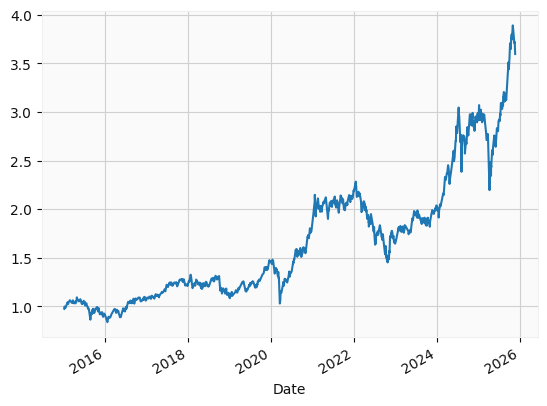

In [85]:
tw0050 = yf.download('0050.TW', auto_adjust = False, start = '2015-01-01')
tw0050.columns = tw0050.columns.get_level_values(0)

# 計算報酬率
def ttl_ratio(i):
    return i + 1
tw0050['closereturn_ratio'] = tw0050['Close'].pct_change(periods = 1)
tw0050['closereturn_ratio'].apply(ttl_ratio).cumprod().plot()